#머신러닝 및 응용 6장 실습 코드
G202358021 안종혁

In [1]:
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#결정 트리 학습과 시각화

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

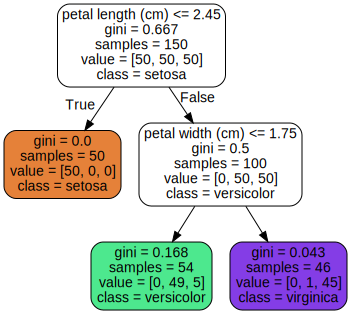

In [3]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

#결정트리 분류 모델의 클래스 예측결과의 시각화

Saving figure decision_tree_decision_boundaries_plot


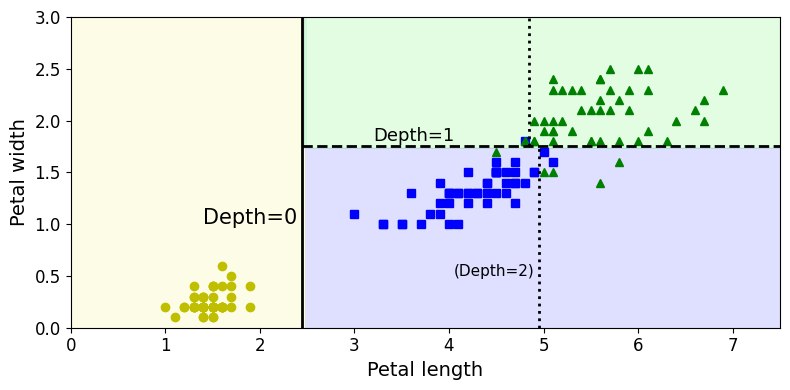

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)        # 1차 분할 기준선
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)  # 2차 분할 기준선
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)     # 3차 분할 기준선 (우하단)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)     # 3차 분할 기준선 (우상단)

plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

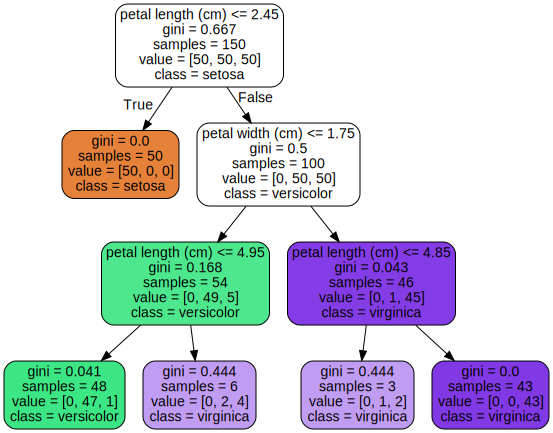

In [6]:
tree_clf_d3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_d3.fit(X, y)

export_graphviz(
        tree_clf_d3,
        out_file=os.path.join(IMAGES_PATH, "iris_tree_d3.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree_d3.dot"))

#클래스 확률 추정
꽃잎 길이와 너비가 5, 1.5cm인 iris의 품종별 확률과 예측값을 나타낸다
단 이때 maximal_depth가 2와 3일때로 본다.

In [8]:
#depth=2일때 예측값은 버시컬러로 예측한다
tree_clf.predict_proba([[5, 1.5]])


array([[0.        , 0.90740741, 0.09259259]])

In [9]:
tree_clf.predict([[5, 1.5]])

array([1])

In [10]:
#depth=3일때 예측값은 버지니카로 예측한다
tree_clf_d3.predict_proba([[5, 1.5]])


array([[0.        , 0.33333333, 0.66666667]])

In [11]:
tree_clf_d3.predict([[5, 1.5]])


array([2])

#규제 매개변수
밑 그림은 min_samples_leaf=4 규제를 사용한 모델(우측)과 어떠한 규제도 사용하지 않은 모델(우측)의 차이를 보여준다.

Saving figure min_samples_leaf_plot


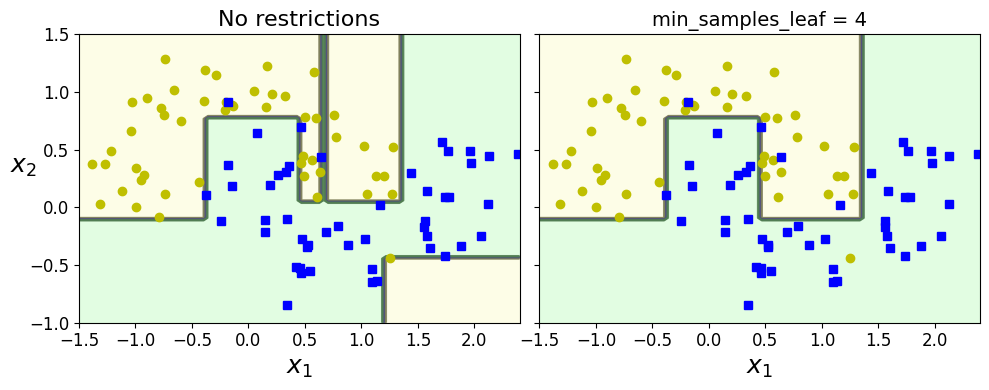

In [12]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)  # 규제 없음
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)  # 규제 사용
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

#회귀
결정트리 회귀모델은 분류모델과 거의 비슷한 알고리즘을 사용한다. 2차 다항식을 이용하여 생성되어진 훈련 세트에 대한 결정트리 회귀모델 훈련을 보인다.

In [13]:
# 2차 다항식 훈련세트 + 잡음
np.random.seed(42)

m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [23]:
#max_depth를 2 또는 3으로 지정하고 회귀모델을 훈련시킨 결과
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)  # max_depth=2
tree_reg1.fit(X, y)


DecisionTreeRegressor(max_depth=2, random_state=42)

In [24]:
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)  # max_depth=3
tree_reg2.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

왼편 그림은 max_depth가 2인 경우이고 오른 쪽 그림은 max_depth가 3인 경우이다.
또한 아래 함수는 훈련 세트와 노드별 예측값(빨강 선)을 그린다.


Saving figure tree_regression_plot


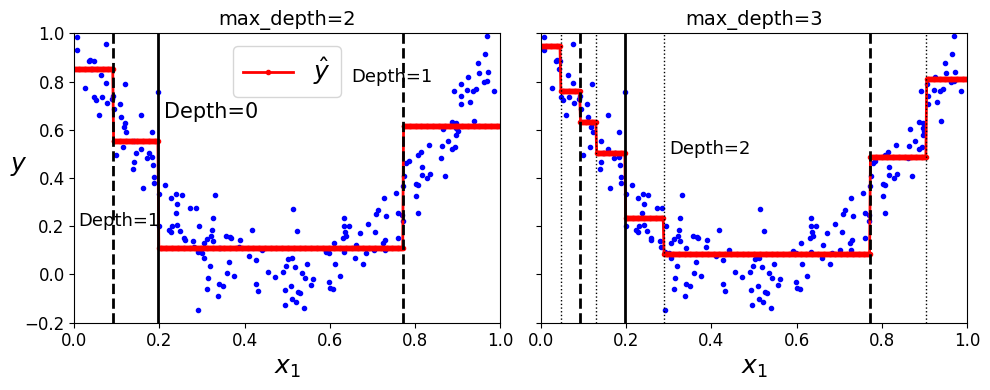

In [25]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# 왼편 그림
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

# 오른편 그림
plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

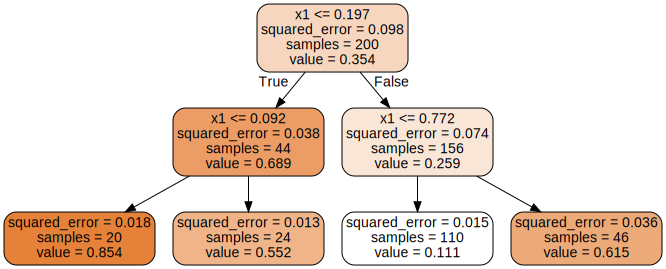

In [26]:
#왼쪽 그래프의 결정트리 회귀모델의 구조는 다음과 같다.
export_graphviz(
        tree_reg1,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

#회귀 모델의 규제
CART알고리즘을 이용하여 의사결정나무 회귀모델의 규제를 사용한다.
노드 분할에 사용하는 기준 하이퍼파라미터에 사용되어지는 값을 제외하고 분류모델과 동일하다.
단 이때 비용함수의 기준이 분류 모델과 회귀 모델에서 차이가 있다.


분류 모델의 비용함수 기준: 지니 불순도, 엔트로피
(gini, entropy)


회귀 모델의 비용함수 기준: 평균제곱오차, 프리드먼 평균제곱옻파, 평균 절대오차, 포아송
(mse, friedman_mse, mae, poisson)

Saving figure tree_regression_regularization_plot


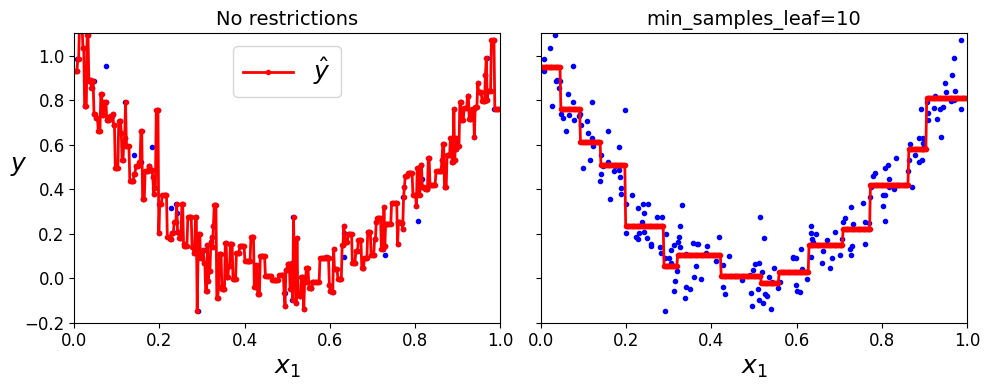

In [27]:
#위 코드는 min_samples_leaf=10 규제(리프노드에 최소 10개 이상의 샘플 있어야함)를 사용하는 회귀모델(우측)과 규제를 사용하지 않은 회귀모델(좌측)의 차이를 보여준다
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# 왼편 그림
plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

# 오른편 그림
plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()

#불안정성
의사결정나무는 쉽고 성능이 강력하지만 회전, 샘플의 추가 혹은 삭제와 같은 train set의 변화에 민감하기 때문에 두가지 예제로 회전 민감도에 대해서 확인해 보려한다.

#1 회전 민감도
아래 코드는 결정트리 모델의 회전 민감도를 보여준다. 두 개의 특성을 가지며, 임의로 생성된 100개의 훈련 샘플을 시계방향으로 45도 회전시킨 후 훈련시킨 모델의 결정경계가 직선에서 계단식으로 변화되는 것을 볼 수 있다. 결국 일반화 성능이 보다 약한 모델이 생성되었다.

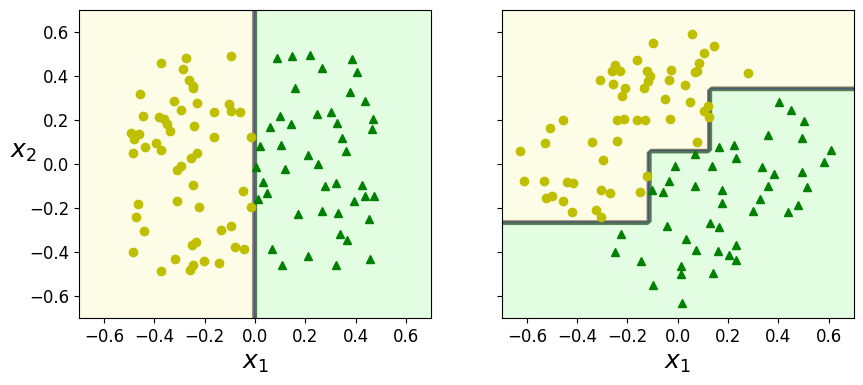

In [29]:
#두 개의 특성을 갖는 100개의 훈련 샘플 생성. 둘째 특성값의 부호에 따라 두 클래스로 분류.
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

#시계방향으로 45도 회전시키기
angle = np.pi / 4  # 회전 각도

# 훈련 세트 회전시키기
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)
# 오른편 그래프에 Xsr이 활용되어진다.

# 왼편 그래프 모델
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)

# 오른편 그래프 모델
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

# 그래프 그리기
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
# 왼편 그래프
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

# 오른편 그래프
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

plt.show()

#2 회전 민감도
아래 코드는 iris 데이터를 시계방향으로 20도 회전한 후에 훈련시키면 분류 모델의 결정경계가 이전과 많이 다름을 잘 보여준다.



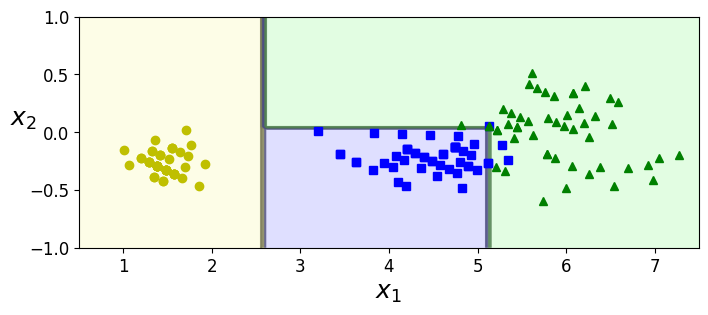

In [30]:
iris = load_iris()
X = iris.data[:, 2:] # 꽃잎의 길이와 너비
y = iris.target

# 시계방향으로 20도 회전
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

#샘플 민감도 예제
아래 코드는 훈련세트에 포함된 버시컬러 품종 중에서 가장 넓은 꽃잎을 가진 샘플을 삭제한 후에 훈련시킨 결정트리 분류모델의 결정경계를 보여준다. 이전과 많이 다름에 주의하라

In [31]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # 가장 넓은 꽃잎을 갖는 버시컬러 샘플의 특성 확인
# 버시컬러 샘플 중에서 가장 넓은 꽃잎의 너비 1.8cm 확인


array([[4.8, 1.8]])

In [32]:
# 가장 넓은 버시컬러 샘플 제거이후 훈련
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)  # y==2는 버지니카 품종은 그대로 둠.

X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

Saving figure decision_tree_instability_plot


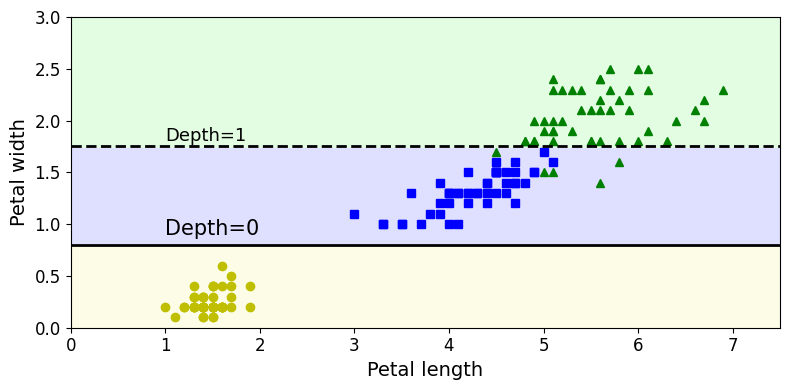

In [33]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()